# Movie Quotes Corpus EDA

# 1. Cleaning

In [32]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
pwd

'/tf/lec/Galvanize/ResumeClassifier/data/cornell_movie_dialogs_corpus/movie-dialog-corpus'

In [5]:
ls

README.txt                     movie_lines.tsv
movie_characters_metadata.tsv  movie_titles_metadata.tsv
movie_conversations.tsv        raw_script_urls.tsv


In [8]:
conver_df = pd.read_csv('./movie_conversations.tsv',encoding='ISO-8859-2',warn_bad_lines =False,sep='\t',header=None)
lines_df = pd.read_csv('./movie_lines.tsv',sep='\t',error_bad_lines=False,warn_bad_lines =False,header=None)
characters_df = pd.read_csv('./movie_characters_metadata.tsv',sep='\t',warn_bad_lines =False,error_bad_lines=False,header=None)

In [9]:
conversations_cols = ["characterID_First", "characterID_second", "movieID", "list_of_utterances"]
lines_cols = ['lineID', 'characterID', 'movieID', 'character_name', 'text_of_utterances']
characters_metadata_cols = ['characterID', 'character_name', 'movieID', 'movieTitle', 'gender', 'position_in_credits']
titles_metadata_cols = ['movieID', 'movieTitle', 'movieYear', 'IMDB_rating', 'numIMDBvotes', 'Genres']

In [10]:
conver_df.columns=conversations_cols
conver_df.head()

,characterID_First,characterID_second,movieID,list_of_utterances
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197']
1,u0,u2,m0,['L198' 'L199']
2,u0,u2,m0,['L200' 'L201' 'L202' 'L203']
3,u0,u2,m0,['L204' 'L205' 'L206']
4,u0,u2,m0,['L207' 'L208']


In [11]:
lines_df.columns = lines_cols
lines_df.head()

,lineID,characterID,movieID,character_name,text_of_utterances
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [12]:
characters_df.columns=characters_metadata_cols
characters_df.head()

,characterID,character_name,movieID,movieTitle,gender,position_in_credits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [13]:
conver_df.shape, lines_df.shape, characters_df.shape

((83097, 4), (293202, 5), (9034, 6))

In [14]:
df = pd.merge(lines_df, characters_df, how='inner', on=['characterID','movieID','character_name'],
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
df.head()

,lineID,characterID,movieID,character_name,text_of_utterances,movieTitle,gender,position_in_credits
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,f,4
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,f,4
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,f,4
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,f,4
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,f,4


In [15]:
df.shape

(288447, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288447 entries, 0 to 288446
Data columns (total 8 columns):
lineID                 288447 non-null object
characterID            288447 non-null object
movieID                288447 non-null object
character_name         288404 non-null object
text_of_utterances     288193 non-null object
movieTitle             288447 non-null object
gender                 288447 non-null object
position_in_credits    288447 non-null object
dtypes: object(8)
memory usage: 19.8+ MB


In [20]:
df.loc[df['text_of_utterances'].isnull()==True]

,lineID,characterID,movieID,character_name,text_of_utterances,movieTitle,gender,position_in_credits
5022,L239088,u1125,m74,JANOSZ,NaN,ghostbusters ii,m,8
13859,L283548,u1356,m90,BRUCE,NaN,his girl friday,m,3
19035,L303243,u1475,m100,JOE,NaN,innerspace,M,?
42890,L24609,u224,m14,SYKES,NaN,alien nation,m,1
67870,L535288,u2919,m192,KRUGE,NaN,star trek iii: the search for spock,?,?
67880,L535203,u2919,m192,KRUGE,NaN,star trek iii: the search for spock,?,?
67884,L535163,u2919,m192,KRUGE,NaN,star trek iii: the search for spock,?,?
67902,L535148,u2919,m192,KRUGE,NaN,star trek iii: the search for spock,?,?
67904,L535133,u2919,m192,KRUGE,NaN,star trek iii: the search for spock,?,?
71079,L540986,u3027,m198,DONATRA,NaN,star trek: nemesis,?,?


In [21]:
#Select only dialogue that is not null
df = df[df['text_of_utterances'].notnull()]

In [22]:
df.to_csv('merged_data.csv', index= False)

In [23]:
df = pd.read_csv('merged_data.csv')
df.head()

,lineID,characterID,movieID,character_name,text_of_utterances,movieTitle,gender,position_in_credits
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,f,4
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,f,4
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,f,4
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,f,4
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,f,4


In [24]:
df.shape

(288193, 8)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288193 entries, 0 to 288192
Data columns (total 8 columns):
lineID                 288193 non-null object
characterID            288193 non-null object
movieID                288193 non-null object
character_name         288150 non-null object
text_of_utterances     288193 non-null object
movieTitle             288193 non-null object
gender                 288193 non-null object
position_in_credits    288193 non-null object
dtypes: object(8)
memory usage: 17.6+ MB


In [39]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [37]:
wordnet_lemmatizer = WordNetLemmatizer()
def clean_dialogue( dialogue ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", dialogue) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))   
    
    # 5. Use lemmatization and remove stop words
    meaningful_words = [wordnet_lemmatizer.lemmatize(w) for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

In [40]:
df_copy = df.copy()
df_copy['cleaned_text_of_utterances'] = df_copy['text_of_utterances'].apply(clean_dialogue)
df_copy.head()

,lineID,characterID,movieID,character_name,text_of_utterances,movieTitle,gender,position_in_credits,cleaned_text_of_utterances
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,f,4,
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,f,4,hope
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,f,4,let go
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,f,4,okay gonna need learn lie
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,f,4,like fear wearing pastel


In [45]:
#Get only lines spoken by out focus characters
def getDialogue(df, name,mName):
    dialogs = df[(df['character_name']==name)&(df['movieTitle']==mName)]['cleaned_text_of_utterances'].values
    if dialogs.shape[0]==0:
        print("Not Found")
        return "Not Found"
    return dialogs

In [46]:
getDialogue(df_copy, 'BIANCA','10 things i hate about you')

array(['', 'hope', 'let go', 'okay gonna need learn lie',
       'like fear wearing pastel', 'good stuff',
       'endless blonde babble like boring', 'listen crap', '', 'well', '',
       'ton', 'know chastity', 'hi',
       'know ever heard say dip dating guy smoke',
       'lesbian found picture jared leto one drawer pretty sure harboring sex tendency',
       'really really really wanna go unless sister go',
       'eber deep conditioner every two day never ever use blowdryer without diffuser attachment',
       'sweet',
       'counted help cause thug obviously failing ever going date', '',
       'little find wench date plan progressing', 'forget french',
       'want know say though want know useful thing like good store much champagne cost stuff like chat never life point head someone',
       'c esc tete head', 'gosh could find kat boyfriend',
       'unsolved mystery used really popular started high school like got sick something',
       'thing cameron mercy particularly hid

In [51]:
def getWordCloud(df, chName, mName):
    dialogues= list(getDialogue(df, chName, mName))
    words = [word  for dialog in dialogues for word in dialog.split(" ")]
    wordcloud = WordCloud(max_font_size=40,background_color="white").generate(" ".join(words))
    plt.figure()
    plt.title("%s's word cloud from \"%s\""%(chName,mName))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    
    plt.show()

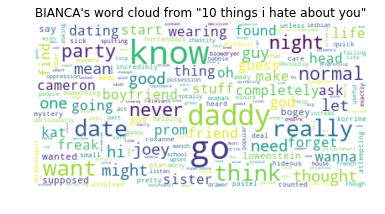

In [52]:
getWordCloud(df_copy, 'BIANCA', '10 things i hate about you')

# randomly select one character and see its word cloud

In [57]:
def randomWordCloud(df):
    sample = df.sample(1)
    getWordCloud(df, sample['character_name'].values[0],sample['movieTitle'].values[0])

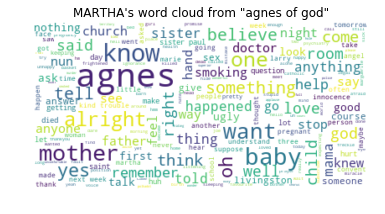

In [58]:
randomWordCloud(df_copy)

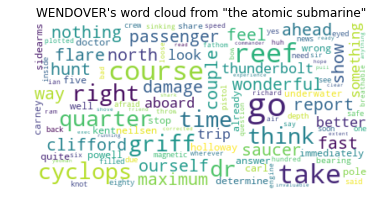

In [59]:
randomWordCloud(df_copy)

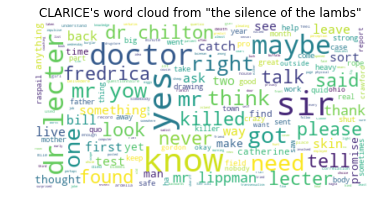

In [60]:
randomWordCloud(df_copy)